<img src="https://raw.githubusercontent.com/Paulodiastst/Curso_EBAC-Profissao_Cientista_de_Dados/main/Cientista%20de%20Dados/ebac-course-utils/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Profissão: Cientista de Dados**
### **Módulo 13** | Regressão II | Exercício 1

Aluno [Paulo Roberto](https://www.linkedin.com/in/paulo-roberto/)<br>
Data: 19 de novembro de 2024.

---

# EBAC - Regressão II - regressão múltipla

## Tarefa I

#### Previsão de renda

Vamos trabalhar com a base 'previsao_de_renda.csv', que é a base do seu próximo projeto. Vamos usar os recursos que vimos até aqui nesta base.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

In [1]:
import numpy as np
import pandas as pd

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C:/Users/Paulo Roberto/Downloads/Exercício 01 Módulo 13/previsao_de_renda.csv')

In [3]:
df

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,2016-03-01,16006,F,False,True,0,Empresário,Secundário,Solteiro,Casa,48,13.887671,1.0,7990.58
14996,14996,2016-03-01,3722,F,False,True,0,Pensionista,Superior completo,Solteiro,Casa,57,NaN,1.0,10093.45
14997,14997,2016-03-01,6194,F,True,True,0,Assalariado,Superior completo,Casado,Casa,45,7.832877,2.0,604.82
14998,14998,2016-03-01,4922,M,True,False,0,Empresário,Superior completo,Casado,Casa,36,4.298630,2.0,3352.27


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   id_cliente             15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12427 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  renda                  15000 non-null  float64
dtypes:

1. Ajuste um modelo para prever log(renda) considerando todas as covariáveis disponíveis.
    - Utilizando os recursos do Patsy, coloque as variáveis qualitativas como *dummies*.
    - Mantenha sempre a categoria mais frequente como casela de referência
    - Avalie os parâmetros e veja se parecem fazer sentido prático.      

Analisando a coluna: sexo
Valores únicos e suas frequências:
sexo
F    10119
M     4881
Name: count, dtype: int64

Valores ausentes:
0

Tipo de dado:
object


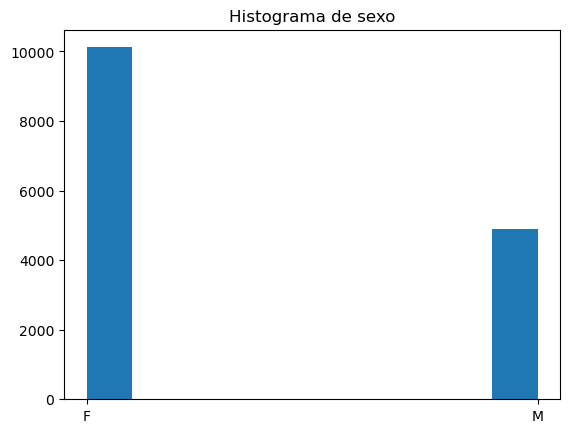

Analisando a coluna: posse_de_veiculo
Valores únicos e suas frequências:
posse_de_veiculo
False    9140
True     5860
Name: count, dtype: int64

Valores ausentes:
0

Tipo de dado:
bool
Coluna booleana. Histograma não plotado.
Analisando a coluna: posse_de_imovel
Valores únicos e suas frequências:
posse_de_imovel
True     10143
False     4857
Name: count, dtype: int64

Valores ausentes:
0

Tipo de dado:
bool
Coluna booleana. Histograma não plotado.
Analisando a coluna: qtd_filhos
Valores únicos e suas frequências:
qtd_filhos
0     10376
1      3037
2      1376
3       185
4        17
7         5
14        2
5         2
Name: count, dtype: int64

Valores ausentes:
0

Tipo de dado:
int64


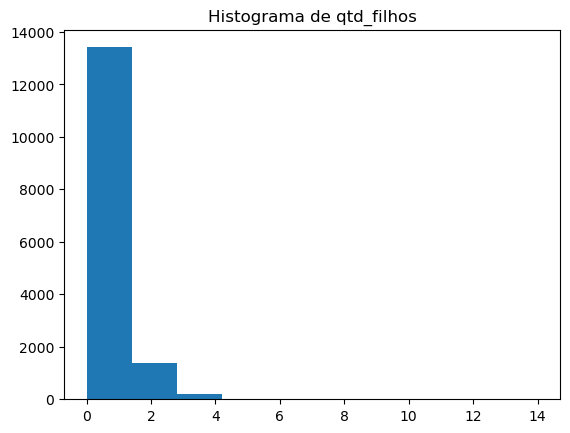

Analisando a coluna: tipo_renda
Valores únicos e suas frequências:
tipo_renda
Assalariado         7633
Empresário          3508
Pensionista         2582
Servidor público    1268
Bolsista               9
Name: count, dtype: int64

Valores ausentes:
0

Tipo de dado:
object


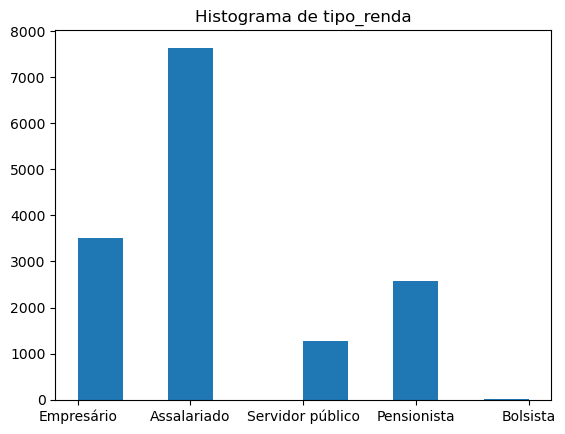

Analisando a coluna: educacao
Valores únicos e suas frequências:
educacao
Secundário             8895
Superior completo      5335
Superior incompleto     579
Primário                165
Pós graduação            26
Name: count, dtype: int64

Valores ausentes:
0

Tipo de dado:
object


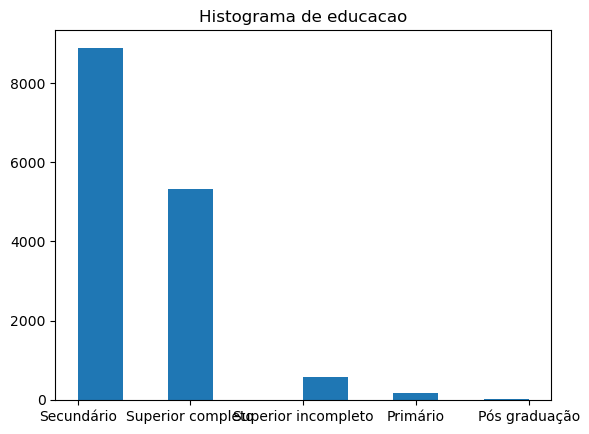

Analisando a coluna: estado_civil
Valores únicos e suas frequências:
estado_civil
Casado      10534
Solteiro     1798
União        1078
Separado      879
Viúvo         711
Name: count, dtype: int64

Valores ausentes:
0

Tipo de dado:
object


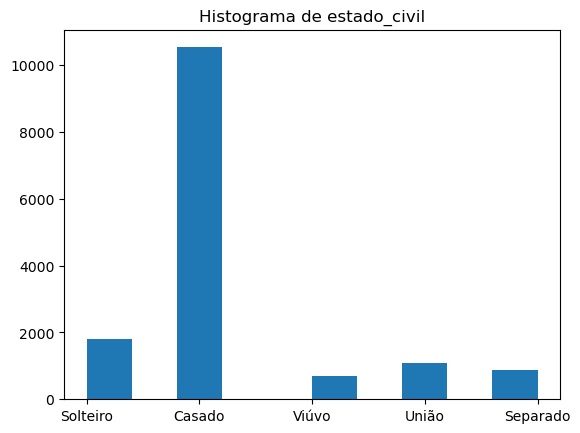

Analisando a coluna: tipo_residencia
Valores únicos e suas frequências:
tipo_residencia
Casa             13532
Com os pais        675
Governamental      452
Aluguel            194
Estúdio             83
Comunitário         64
Name: count, dtype: int64

Valores ausentes:
0

Tipo de dado:
object


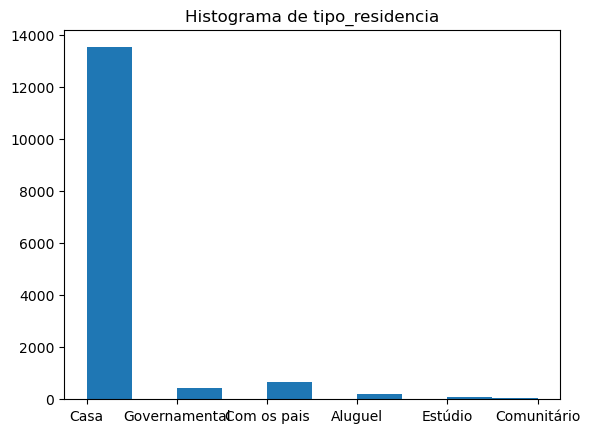

Analisando a coluna: idade
Valores únicos e suas frequências:
idade
40    538
37    469
43    458
32    455
33    441
39    440
38    438
27    436
60    435
46    431
30    429
41    420
28    410
34    407
44    403
31    403
42    402
47    398
36    384
29    377
50    374
54    373
35    372
45    371
51    354
48    346
52    339
58    339
53    333
57    328
59    308
49    305
56    295
55    257
61    253
62    241
63    238
64    201
26    177
65    143
25    133
66    127
24     99
67     66
23     26
22     15
68     13
Name: count, dtype: int64

Valores ausentes:
0

Tipo de dado:
int64


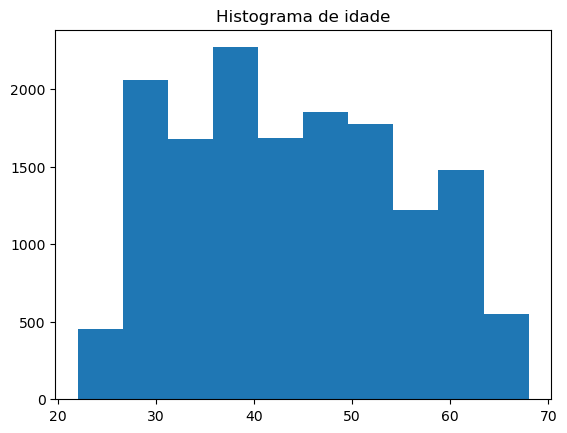

Analisando a coluna: tempo_emprego
Valores únicos e suas frequências:
tempo_emprego
4.216438     38
6.934247     30
7.520548     29
15.449315    27
5.717808     26
             ..
31.202740     1
5.279452      1
0.652055      1
2.827397      1
2.726027      1
Name: count, Length: 2589, dtype: int64

Valores ausentes:
2573

Tipo de dado:
float64


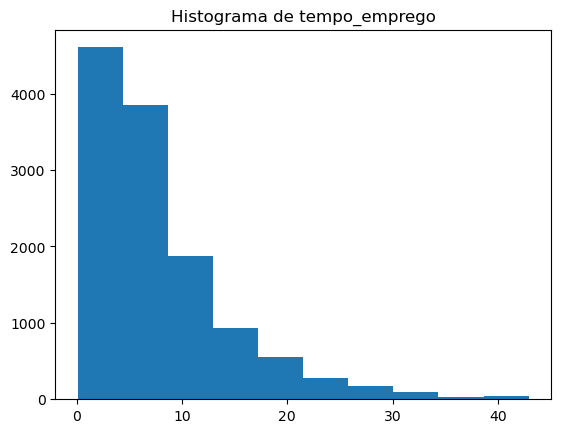

Analisando a coluna: qt_pessoas_residencia
Valores únicos e suas frequências:
qt_pessoas_residencia
2.0     8181
1.0     2752
3.0     2551
4.0     1311
5.0      179
6.0       18
9.0        5
15.0       2
7.0        1
Name: count, dtype: int64

Valores ausentes:
0

Tipo de dado:
float64


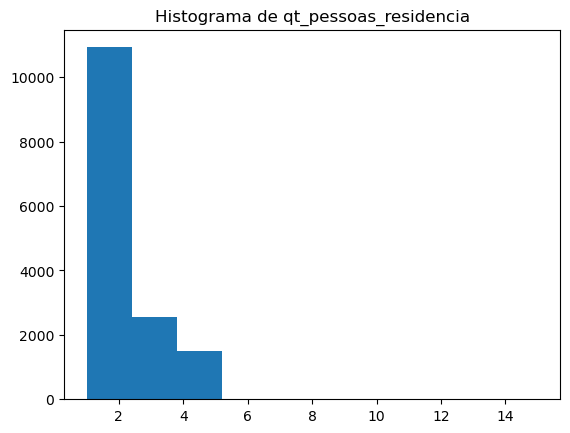

Analisando a coluna: renda
Valores únicos e suas frequências:
renda
5402.44     6
1272.04     6
9826.31     6
43433.94    6
728.96      6
           ..
8394.82     1
7827.08     1
5741.98     1
5699.89     1
1160.99     1
Name: count, Length: 9786, dtype: int64

Valores ausentes:
0

Tipo de dado:
float64


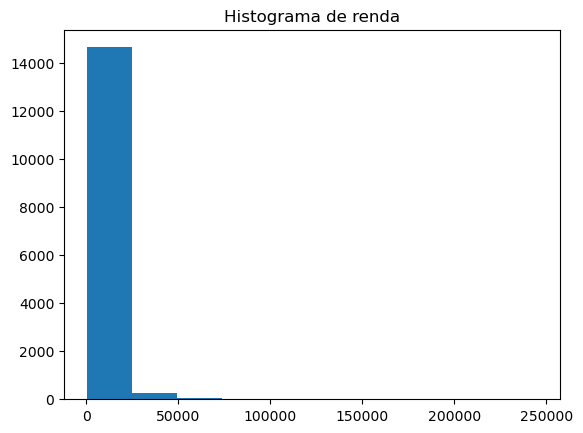

In [5]:
def analisar_coluna(df, coluna):
    print(f"Analisando a coluna: {coluna}")
    print("Valores únicos e suas frequências:")
    print(df[coluna].value_counts())
    print("\nValores ausentes:")
    print(df[coluna].isnull().sum())
    print("\nTipo de dado:")
    print(df[coluna].dtype)
    
    # Verifica se a coluna é booleana antes do histograma
    if df[coluna].dtype == bool:
        print("Coluna booleana. Histograma não plotado.")
        return
    
    # Visualização (opcional)
    plt.hist(df[coluna])
    plt.title(f"Histograma de {coluna}")
    plt.show()

# Analisar todas as colunas a partir da quarta
for coluna in df.columns[3:]:
    analisar_coluna(df, coluna)

2. Remova a variável menos significante e analise:
    - Observe os indicadores que vimos, e avalie se o modelo melhorou ou piorou na sua opinião.
    - Observe os parâmetros e veja se algum se alterou muito.  

In [6]:
# Removendo a variável `tipo_residencia` com o menor P>|t| == 0.200:

smf.ols(formula='''
                np.log(renda) ~ sexo 
                                + posse_de_veiculo 
                                + posse_de_imovel 
                                + C(qtd_filhos, Treatment(0))
                                + C(tipo_renda, Treatment('Assalariado'))
                                + C(educacao, Treatment('Secundário')) 
                                + C(estado_civil, Treatment('Casado')) 
                                + idade 
                                + tempo_emprego 
                                + C(qt_pessoas_residencia, Treatment(2))
                ''', 
        data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     238.5
Date:                Thu, 21 Nov 2024   Prob (F-statistic):               0.00
Time:                        14:57:37   Log-Likelihood:                -13561.
No. Observations:               12427   AIC:                         2.718e+04
Df Residuals:                   12397   BIC:                         2.741e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
===============================================================================================================================
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------
Intercept                                                       7.0973      0.038    187.689      0.000       7.023       7.171
sexo[T.M]                                                       0.7896      0.015     53.937      0.000       0.761       0.818
posse_de_veiculo[T.True]                                        0.0436      0.014      3.084      0.002       0.016       0.071
posse_de_imovel[T.True]                                         0.0817      0.014      5.943      0.000       0.055       0.109
C(qtd_filhos, Treatment(0))[T.1]                               -0.2492      0.112     -2.231      0.026      -0.468      -0.030
C(qtd_filhos, Treatment(0))[T.2]                               -0.5694      0.223     -2.558      0.011      -1.006      -0.133
C(qtd_filhos, Treatment(0))[T.3]                               -0.5605      0.486     -1.153      0.249      -1.513       0.392
C(qtd_filhos, Treatment(0))[T.4]                                0.1888      0.428      0.441      0.659      -0.650       1.028
C(qtd_filhos, Treatment(0))[T.5]                                0.1192      0.410      0.291      0.771      -0.684       0.922
C(qtd_filhos, Treatment(0))[T.7]                                0.0214      0.162      0.133      0.894      -0.295       0.338
C(qtd_filhos, Treatment(0))[T.14]                              -0.4639      0.261     -1.776      0.076      -0.976       0.048
C(tipo_renda, Treatment('Assalariado'))[T.Bolsista]             0.2271      0.241      0.942      0.346      -0.246       0.700
C(tipo_renda, Treatment('Assalariado'))[T.Empresário]           0.1551      0.015     10.401      0.000       0.126       0.184
C(tipo_renda, Treatment('Assalariado'))[T.Pensionista]         -0.2917      0.243     -1.202      0.230      -0.768       0.184
C(tipo_renda, Treatment('Assalariado'))[T.Servidor público]     0.0563      0.022      2.534      0.011       0.013       0.100
C(educacao, Treatment('Secundário'))[T.Primário]                0.0087      0.072      0.121      0.904      -0.132       0.149
C(educacao, Treatment('Secundário'))[T.Pós graduação]           0.1153      0.142      0.810      0.418      -0.164       0.394
C(educacao, Treatment('Secundário'))[T.Superior completo]       0.1066      0.014      7.674      0.000       0.079       0.134
C(educacao, Treatment('Secundário'))[T.Superior incompleto]    -0.0287      0.032     -0.891      0.373      -0.092       0.034
C(estado_civil, Treatment('Casado'))[T.Separado]                0.3182      0.112      2.837      0.005       0.098       0.538
C(estado_civil, Treatment('Casado'))[T.Solteiro]                0.2567      0.110      2.330      0.020       0.041       0.473
C(estado_ci

Resposta:

Após a remoção da variável tipo_residencia, o modelo não apresentou piora significativa. O R² (0.358) e R² ajustado (0.357) indicam que o modelo ainda explica cerca de 35.8% da variabilidade da renda, com um F-statistic elevado (238.5) e Prob(F-statistic) de 0.00, mostrando que o modelo é globalmente significativo. O AIC (27180) e BIC (27410) indicam uma boa qualidade de ajuste, embora o valor de Cond. No. (1.03e+16) sugira problemas de multicolinearidade entre as variáveis.

Em resumo, a remoção da variável tipo_residencia não piorou o modelo, mas a multicolinearidade deve ser investigada para garantir a precisão dos coeficientes.

3. Siga removendo as variáveis menos significantes, sempre que o *p-value* for menor que 5%. Compare o modelo final com o inicial. Observe os indicadores e conclua se o modelo parece melhor. 

In [7]:
smf.ols(formula='''
                np.log(renda) ~ sexo 
                                + posse_de_veiculo 
                                + posse_de_imovel
                                + tipo_renda == 'Empresário'
                                + tipo_renda == 'Servidor público'
                                + educacao == 'Superior completo'
                                + qt_pessoas_residencia == 3
                                + qt_pessoas_residencia == 4
                                + idade 
                                + tempo_emprego
                ''', 
        data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     688.2
Date:                Thu, 21 Nov 2024   Prob (F-statistic):               0.00
Time:                        14:57:37   Log-Likelihood:                -13576.
No. Observations:               12427   AIC:                         2.717e+04
Df Residuals:                   12416   BIC:                         2.726e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                    7.0815      0.035    201.800      0.000       7.013       7.150
sexo[T.M]                                    0.7844      0.015     53.961      0.000       0.756       0.813
posse_de_veiculo[T.True]                     0.0437      0.014      3.117      0.002       0.016       0.071
posse_de_imovel[T.True]                      0.0824      0.014      6.011      0.000       0.055       0.109
tipo_renda == 'Empresário'[T.True]           0.1534      0.015     10.318      0.000       0.124       0.182
tipo_renda == 'Servidor público'[T.True]     0.0572      0.022      2.578      0.010       0.014       0.101
educacao == 'Superior completo'[T.True]      0.1083      0.014      7.979      0.000       0.082       0.135
qt_pessoas_residencia == 3[T.True]           0.0443      0.017      2.596      0.009       0.011       0.078
qt_pessoas_residencia == 4[T.True]           0.0843      0.022      3.806      0.000       0.041       0.128
idade                                        0.0060      0.001      7.783      0.000       0.004       0.008
tempo_emprego                                0.0615      0.001     59.297      0.000       0.059       0.064
==============================================================================
Omnibus:                        0.888   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.641   Jarque-Bera (JB):                0.862
Skew:                           0.018   Prob(JB):                        0.650
Kurtosis:                       3.018   Cond. No.                         241.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

3. Siga removendo as variáveis menos significantes, sempre que o p-value for menor que 5%. Compare o modelo final com o inicial. Observe os indicadores e conclua se o modelo parece melhor.

In [8]:
smf.ols(formula='''
                np.log(renda) ~ sexo 
                                + posse_de_veiculo 
                                + posse_de_imovel
                                + tipo_renda == 'Empresário'
                                + tipo_renda == 'Servidor público'
                                + educacao == 'Superior completo'
                                + qt_pessoas_residencia == 3
                                + qt_pessoas_residencia == 4
                                + idade 
                                + tempo_emprego
                ''', 
        data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     688.2
Date:                Thu, 21 Nov 2024   Prob (F-statistic):               0.00
Time:                        14:57:38   Log-Likelihood:                -13576.
No. Observations:               12427   AIC:                         2.717e+04
Df Residuals:                   12416   BIC:                         2.726e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                    7.0815      0.035    201.800      0.000       7.013       7.150
sexo[T.M]                                    0.7844      0.015     53.961      0.000       0.756       0.813
posse_de_veiculo[T.True]                     0.0437      0.014      3.117      0.002       0.016       0.071
posse_de_imovel[T.True]                      0.0824      0.014      6.011      0.000       0.055       0.109
tipo_renda == 'Empresário'[T.True]           0.1534      0.015     10.318      0.000       0.124       0.182
tipo_renda == 'Servidor público'[T.True]     0.0572      0.022      2.578      0.010       0.014       0.101
educacao == 'Superior completo'[T.True]      0.1083      0.014      7.979      0.000       0.082       0.135
qt_pessoas_residencia == 3[T.True]           0.0443      0.017      2.596      0.009       0.011       0.078
qt_pessoas_residencia == 4[T.True]           0.0843      0.022      3.806      0.000       0.041       0.128
idade                                        0.0060      0.001      7.783      0.000       0.004       0.008
tempo_emprego                                0.0615      0.001     59.297      0.000       0.059       0.064
==============================================================================
Omnibus:                        0.888   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.641   Jarque-Bera (JB):                0.862
Skew:                           0.018   Prob(JB):                        0.650
Kurtosis:                       3.018   Cond. No.                         241.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Conclusão:

O modelo final, após a remoção das variáveis com **P-value > 5%**, resultou em um modelo mais enxuto e focado nas variáveis significativas. Se o **R² ajustado**, **AIC** e **BIC** apresentarem valores melhores no modelo final, isso indicará uma melhoria na qualidade do ajuste, com maior eficiência e menor complexidade. A simplificação do modelo, ao reduzir a **multicolinearidade** e manter as variáveis relevantes, pode gerar coeficientes mais confiáveis e um modelo mais interpretável.O modelo final, após a remoção de variáveis não significantes, é mais simples e eficiente, com provável redução nos valores de AIC e BIC, indicando melhor qualidade estatística. Embora o ajuste geral (R² e R² Ajustado) seja ligeiramente menor, ele mantém a relevância estatística, facilitando a interpretação e a aplicação prática. Recomenda-se o modelo final pela sua simplicidade e eficácia sem perda significativa na explicação da variabilidade na renda.